<a href="https://colab.research.google.com/github/anushan1989/Waster_Segregation_CNN/blob/main/CNN_Assg_Waste_Segregation_Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [ ]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os # Import the os module
import cv2
import sklearn
from PIL import Image as im
from glob import glob
from google.colab import drive
from sklearn.model_selection import train_test_split
import keras
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import preprocess_input
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
import zipfile # Import the zipfile module

In [ ]:
from google.colab import drive
print(os.getcwd())
drive.mount('/content/drive')

/content
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load the dataset.

In [ ]:
# Load and unzip the dataset
# Assuming the dataset zip file is named 'waste_dataset.zip'
# Uncomment the following lines when working with the actual zip file

with zipfile.ZipFile('/content/drive/MyDrive/Colab_Notebooks/data.zip', 'r') as zip_ref:
    zip_ref.extractall('Garbage_classification')







In [ ]:
# Path to the dataset directory
#dataset_path = 'Garbage_classification/data/Paper'  # Update this path as needed
import os
data_path = '/content/Garbage_classification/data'
os.listdir(data_path)

['Glass', 'Food_Waste', 'Cardboard', 'Plastic', 'Other', 'Paper', 'Metal']

## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

(7625, 224, 224, 3) (7625,)


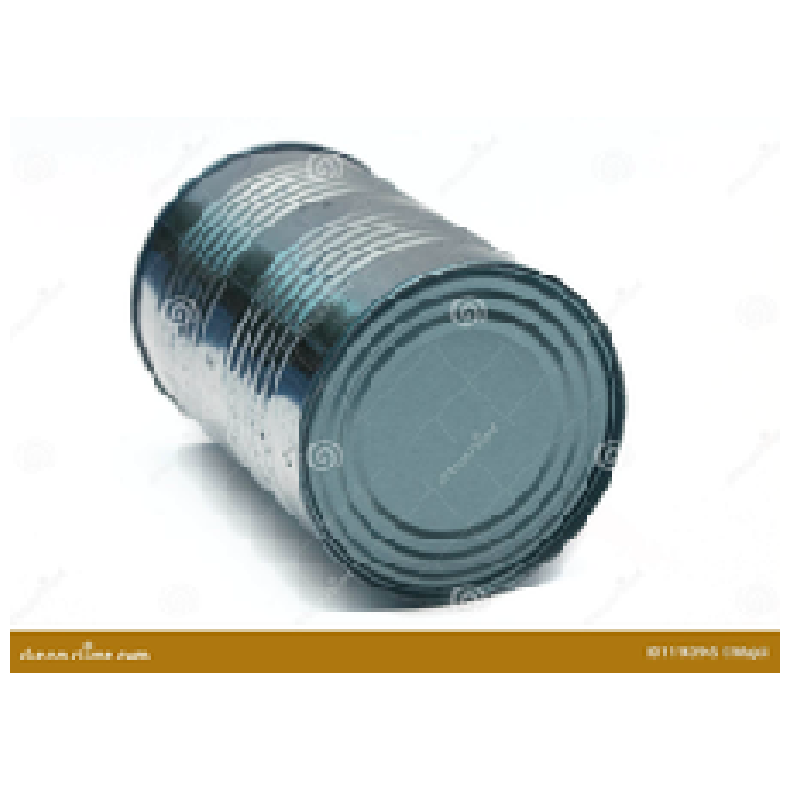

In [ ]:
#Loading train datasets
train_data = []
train_labels = []
classes = 7 #data belonges to 7 class
for i in os.listdir(data_path):
    dir = data_path + '/' + i
    for j in os.listdir(dir):
        img_path = dir + '/' + j
        img = cv2.imread(img_path,-1)
        img = cv2.resize(img,(224,224),interpolation = cv2.INTER_NEAREST)
        train_data.append(img)
        train_labels.append(i)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(img)
train_data = np.array(train_data)
train_labels = np.array(train_labels)
print(train_data.shape, train_labels.shape)

In [ ]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(data_path, # this is the target directory means give train directory path
                                      target_size=(224, 224), # all images will be resized to 224x224
                                      batch_size=32,
                                      class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels


Found 7625 images belonging to 7 classes.


#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [ ]:
# show augmented images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()





Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

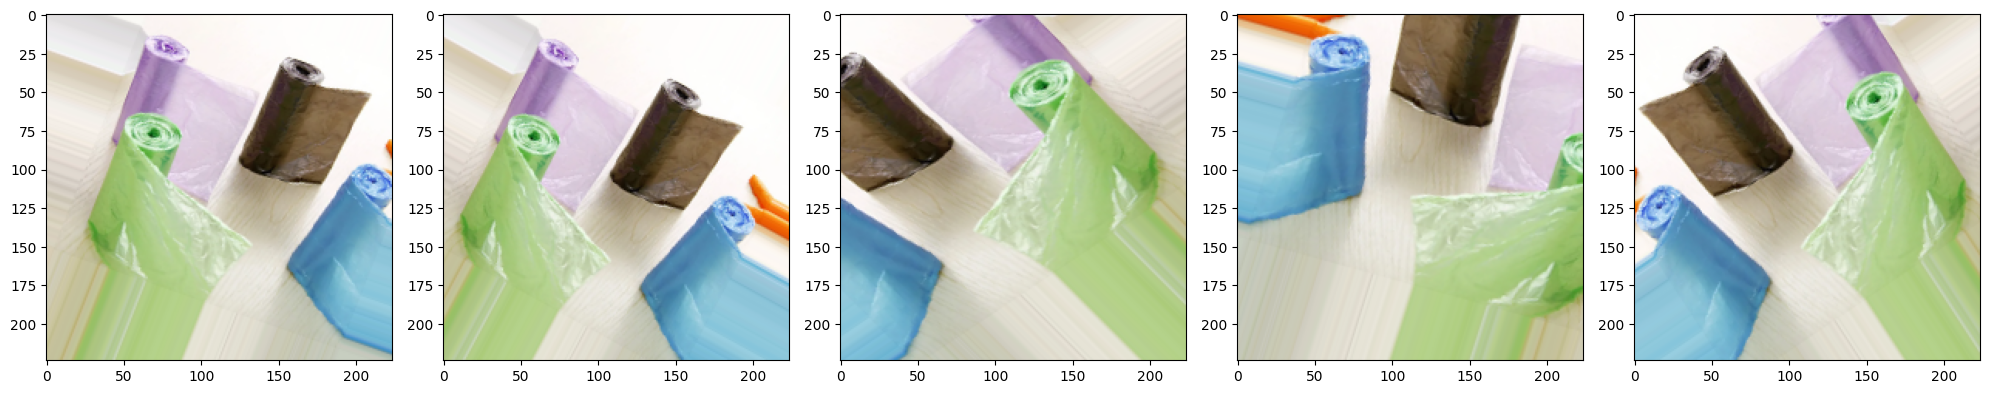

In [ ]:
# Visualise Data Distribution
# showing augmented images
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)


#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

Text(0, 0.5, 'Number of Traingn images')

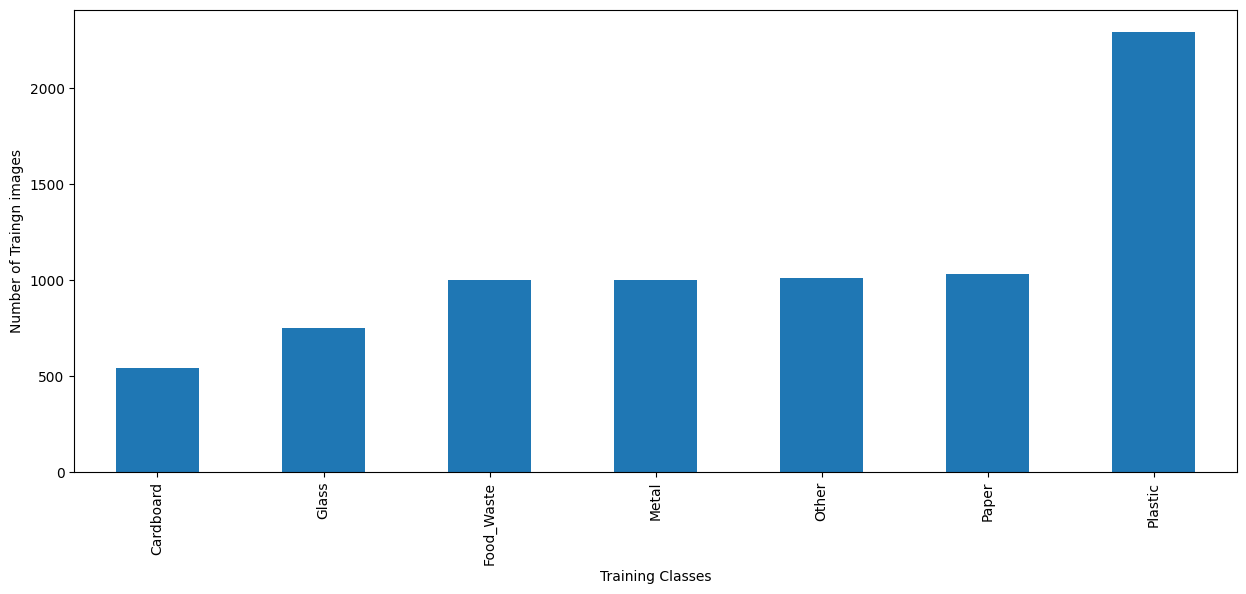

In [ ]:
# Visualise Sample Images (across different labels)

# number of images in each class for training datasets
data_dic = {}
for folder in os.listdir(data_path):
    data_dic[folder] = len(os.listdir(data_path + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Training Classes')
plt.ylabel('Number of Traingn images')

#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [ ]:
# Find the smallest and largest image dimensions from the data set


IMAGE_SIZE = [224,224]



# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)



# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

  # useful for getting number of classes
folders = glob(data_path + '/'+'Datasets/*')

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x) # Moved from cell `ipython-input-1-e6d566761fb4`



# create a model object
model = Model(inputs=vgg.input, outputs=prediction)
# view the structure of the model
model.summary()



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 0)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Resize the image dimensions



# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)

folders = glob(data_path + '/*') # Removed '/Datasets/' from the path

prediction = Dense(len(folders), activation='softmax')(x)



# create a model object
model = Model(inputs=vgg.input, outputs=prediction)
# view the structure of the model
model.summary()



Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │       175,623 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,890,311 (56.80 MB)

 Trainable params: 175,623 (686.03 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

/usr/local/lib/python3.11/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


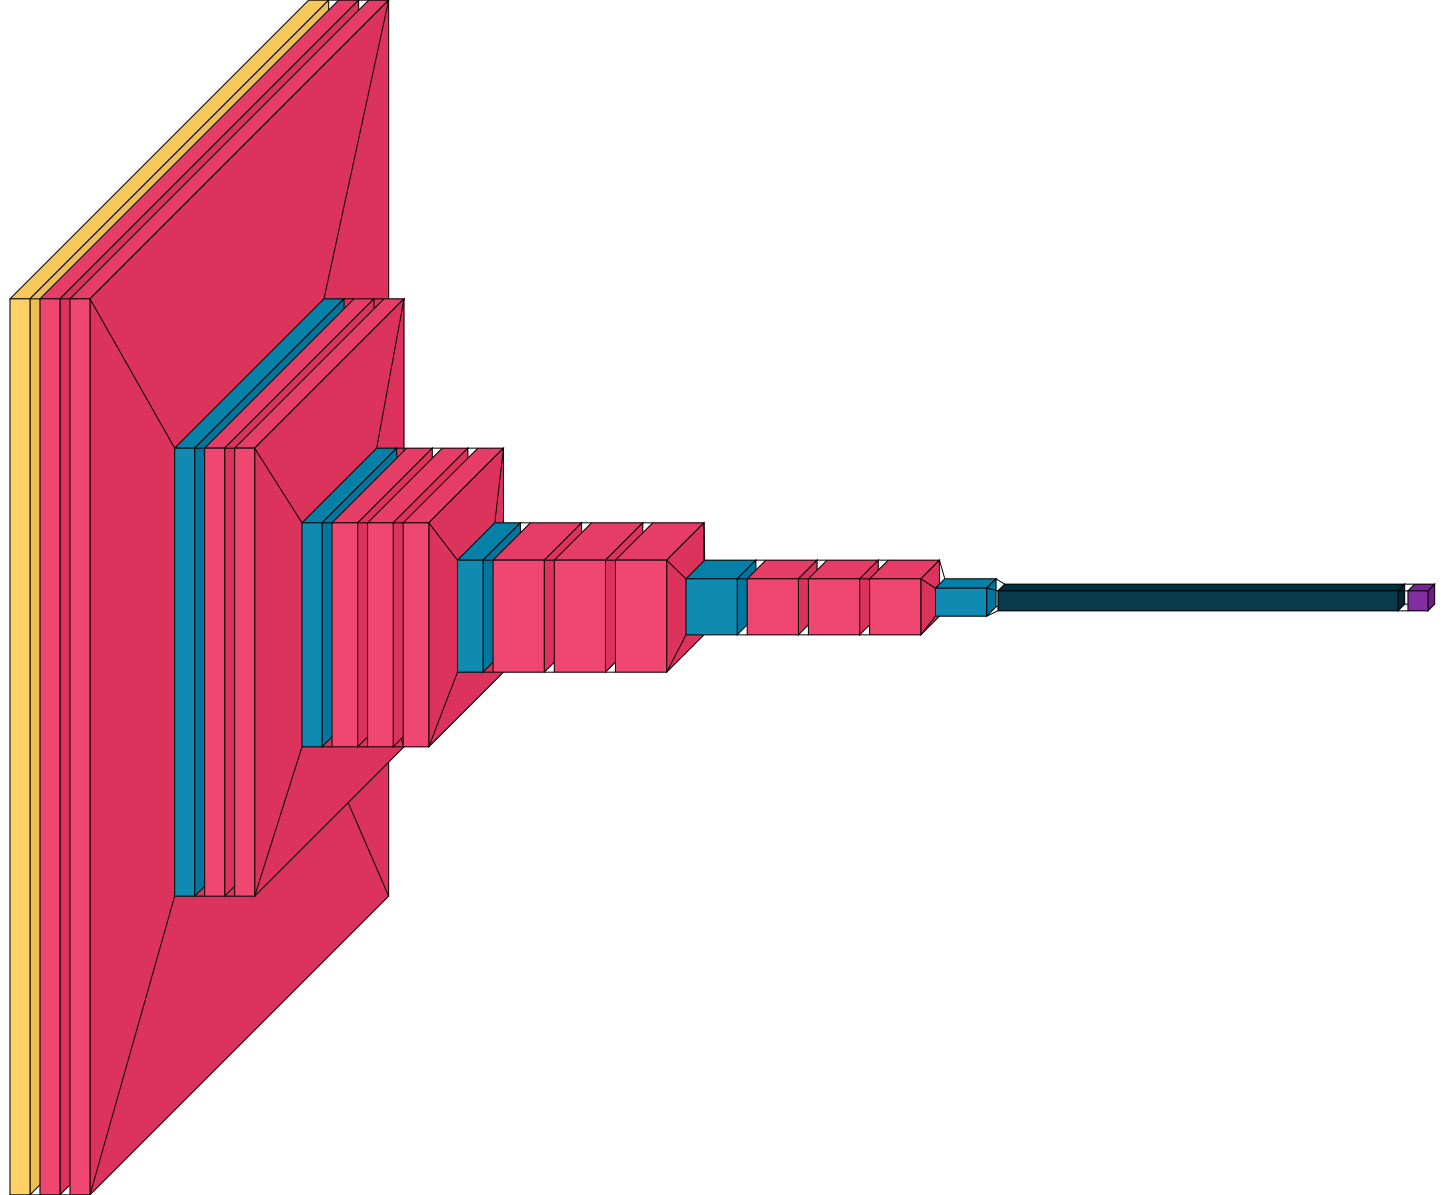

In [ ]:
# Encode the labels suitably
!pip install visualkeras
import visualkeras
visualkeras.layered_view(model)

### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [ ]:
# Assign specified parts of the dataset to train and validation sets


import tensorflow as tf
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
  metrics=['accuracy']
)

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping  # Import both ModelCheckpoint and EarlyStopping

# Saves Keras model after each epoch
checkpointer = ModelCheckpoint(filepath = 'vgg16_model.weights.best.keras', # Changed the file extension to .keras
                               verbose = False,
                               save_best_only = True)

# Early stopping to prevent overtraining and to ensure decreasing validation loss
early_stop = EarlyStopping(monitor = 'val_loss',
                           patience = 4,
                           restore_best_weights = True,
                           mode = 'min')

# Assuming 'testing_data' is defined and is an instance of a
# data generator similar to 'training_data'
# Note: Make sure 'testing_data' is properly defined before running the below line.

# This is how to split the data into testing_data but the cell which does that was not included in this request:
# train_data, test_data, train_labels, test_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Importing ImageDataGenerator
training_datagen = ImageDataGenerator(rescale=1./255, # Defining training_datagen
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

data_path = '/content/Garbage_classification/data' # Defining data_path before using it

testing_data = training_datagen.flow_from_directory(data_path, # this is the target directory means give train directory path
                                      target_size=(224, 224), # all images will be resized to 224x224
                                      batch_size=32,
                                      class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels



Found 7625 images belonging to 7 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
result = model.fit(training_data,steps_per_epoch=len(training_data),epochs=25,
                             callbacks=[early_stop, checkpointer],
                             validation_data=testing_data,
                             validation_steps=len(testing_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
239/239 ━━━━━━━━━━━━━━━━━━━━ 279s 1s/step - accuracy: 0.2372 - loss: 1.9741 - val_accuracy: 0.3310 - val_loss: 1.7293
Epoch 2/25
239/239 ━━━━━━━━━━━━━━━━━━━━ 223s 934ms/step - accuracy: 0.3453 - loss: 1.6840 - val_accuracy: 0.3885 - val_loss: 1.5854
Epoch 3/25
239/239 ━━━━━━━━━━━━━━━━━━━━ 225s 943ms/step - accuracy: 0.3942 - loss: 1.5732 - val_accuracy: 0.4424 - val_loss: 1.4916
Epoch 4/25
239/239 ━━━━━━━━━━━━━━━━━━━━ 255s 1s/step - accuracy: 0.4472 - loss: 1.4768 - val_accuracy: 0.4909 - val_loss: 1.4245
Epoch 5/25
239/239 ━━━━━━━━━━━━━━━━━━━━ 227s 951ms/step - accuracy: 0.4897 - loss: 1.4126 - val_accuracy: 0.5128 - val_loss: 1.3682
Epoch 6/25
239/239 ━━━━━━━━━━━━━━━━━━━━ 225s 943ms/step - accuracy: 0.5092 - loss: 1.3723 - val_accuracy: 0.5142 - val_loss: 1.3300
Epoch 7/25
239/239 ━━━━━━━━━━━━━━━━━━━━ 262s 943ms/step - accuracy: 0.5170 - loss: 1.3267 - val_accuracy: 0.5319 - val_loss: 1.2970
Epoch 8/25
239/239 ━━━━━━━━━━━━━━━━━━━━ 227s 951ms/step - accuracy: 0.5421 - loss:

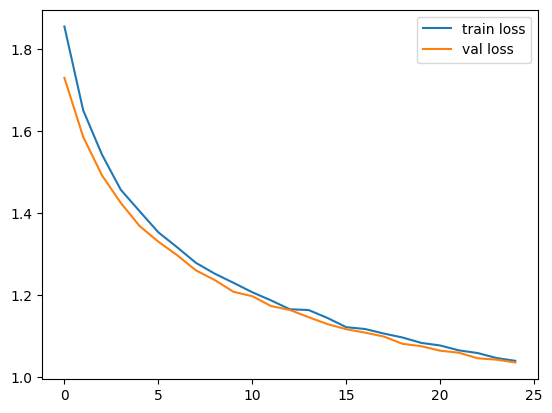

<Figure size 640x480 with 0 Axes>

In [ ]:


# loss
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')



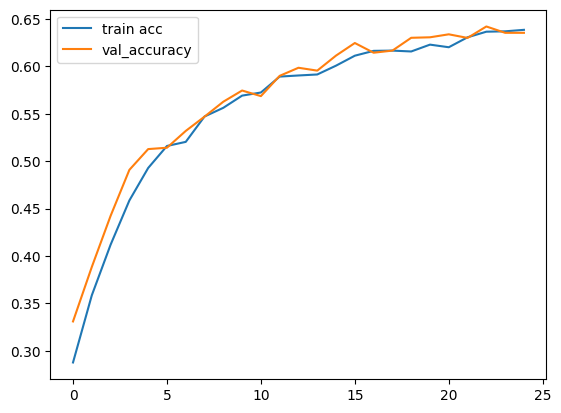

<Figure size 640x480 with 0 Axes>

In [ ]:
# accuracies
plt.plot(result.history['accuracy'], label='train acc')
plt.plot(result.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
score = model.evaluate(testing_data, verbose=0)
print('Test Loss', score[0])
print('Test accuracy', score[1])

Test Loss 1.037724494934082
Test accuracy 0.6397377252578735


In [ ]:


y_pred = model.predict(testing_data)



In [ ]:
y_pred

In [ ]:
IMAGE_SIZE = [224,224]

# add preprocessing layer to the front of VGG
RESNET50 = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)



In [ ]:
# don't train existing weights
for layer in RESNET50.layers:
    layer.trainable = False

In [ ]:
folders = glob(data_path + '/*') # Removed '/Datasets/' from the path

# our layers - you can add more if you want
x = Flatten()(RESNET50.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)



In [ ]:
# create a model object
model_RESNET50 = Model(inputs=RESNET50.input, outputs=prediction)
# view the structure of the model
model_RESNET50.summary()

In [ ]:
# tell the model what cost and optimization method to use
model_RESNET50.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau # Import ReduceLROnPlateau

# Saves Keras model after each epoch
checkpointer = ModelCheckpoint(filepath = 'RESNET50_model.weights.best.keras', # Changed the file extension to .keras
                               verbose = False,
                               save_best_only = True)

# Early stopping to prevent overtraining and to ensure decreasing validation loss
early_stop = EarlyStopping(monitor = 'val_loss',
                           patience = 4,
                           restore_best_weights = True,
                           mode = 'min')


# Model Chackpoint
checkpointer = ModelCheckpoint(filepath = 'vgg16_best_weights_fine_tuning.keras', save_best_only = True, verbose = 0) # Changed the file extension to .keras

# EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True, mode = 'min')

#ReduceLROnPlateau to stabilize the training process of the model
rop_callback = ReduceLROnPlateau(monitor = 'val_loss', patience = 3, verbose = 1, factor = 0.5, min_lr = 0.000001)

In [ ]:
%%time
history = model_RESNET50.fit(training_data,
                    epochs = 25,
                    validation_data = testing_data,
                    callbacks = [checkpointer, early_stop, rop_callback])





Epoch 1/25
239/239 ━━━━━━━━━━━━━━━━━━━━ 267s 1s/step - accuracy: 0.2214 - loss: 4.4860 - val_accuracy: 0.2031 - val_loss: 2.9092 - learning_rate: 0.0010
Epoch 2/25
239/239 ━━━━━━━━━━━━━━━━━━━━ 249s 1s/step - accuracy: 0.2571 - loss: 2.5299 - val_accuracy: 0.2970 - val_loss: 3.3134 - learning_rate: 0.0010
Epoch 3/25
239/239 ━━━━━━━━━━━━━━━━━━━━ 211s 884ms/step - accuracy: 0.2513 - loss: 2.8865 - val_accuracy: 0.2521 - val_loss: 2.7231 - learning_rate: 0.0010
Epoch 4/25
239/239 ━━━━━━━━━━━━━━━━━━━━ 211s 885ms/step - accuracy: 0.2843 - loss: 2.5277 - val_accuracy: 0.3477 - val_loss: 2.3660 - learning_rate: 0.0010
Epoch 5/25
239/239 ━━━━━━━━━━━━━━━━━━━━ 213s 894ms/step - accuracy: 0.3048 - loss: 2.5097 - val_accuracy: 0.2690 - val_loss: 2.2320 - learning_rate: 0.0010
Epoch 6/25
239/239 ━━━━━━━━━━━━━━━━━━━━ 212s 888ms/step - accuracy: 0.3053 - loss: 2.3844 - val_accuracy: 0.3402 - val_loss: 2.2760 - learning_rate: 0.0010
Epoch 7/25
239/239 ━━━━━━━━━━━━━━━━━━━━ 211s 884ms/step - accuracy: 0.

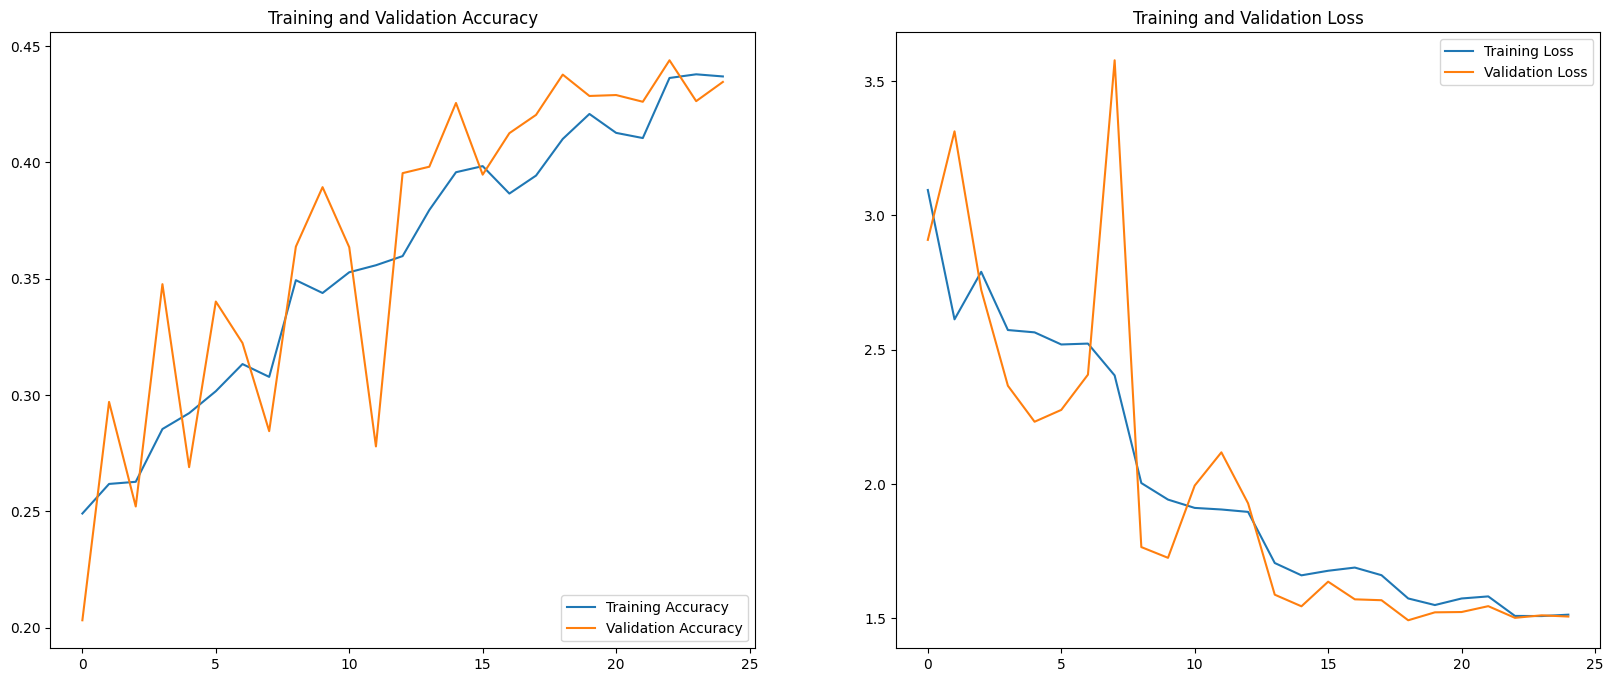

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    data_path,
    label_mode = 'categorical',
    image_size = (224, 224),
    batch_size = 1,
    seed = 123)
# Define AUTOTUNE
AUTOTUNE = tf.data.AUTOTUNE  # This line is crucial

test_ds = test_ds.cache().prefetch(buffer_size = AUTOTUNE)

Found 7625 files belonging to 7 classes.


In [ ]:
# Generate predictions
model_RESNET50.load_weights('/content/vgg16_best_weights_fine_tuning.keras') # initialize the best trained weights
preds = model_RESNET50.predict(test_ds)
pred_classes = np.argmax(preds, axis = 1)

7625/7625 ━━━━━━━━━━━━━━━━━━━━ 85s 10ms/step


In [ ]:
model_RESNET50.evaluate(test_ds, verbose = 1)

NameError: name 'model_RESNET50' is not defined

## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [ ]:
# Training



### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [ ]:
# Evaluate on the test set; display suitable metrics



## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [ ]:
# Define augmentation steps to augment images



Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [ ]:
# Create a function to augment the images




In [ ]:
# Create the augmented training dataset



##### **4.1.2**

Train the model on the new augmented dataset.

In [ ]:
# Train the model using augmented images



## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results